In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy import stats
from scipy import optimize

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from scipy.optimize import minimize

In [11]:
np.set_printoptions(suppress=True, precision=6)

In [12]:
from breakdown_uncertainty_me_tax import SimpleBreakdownModelClass

In [13]:
model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.018,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1}) #'tax':0.03813765261272659

In [14]:
par = model.par
sol = model.sol
sim = model.sim

In [31]:
print(par.gamma_grid)

[0.018  0.0165 0.015  0.0135 0.012 ]


In [15]:
%time model.solve()

48
47


46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 13s, sys: 8.35 s, total: 8min 21s
Wall time: 9min 50s


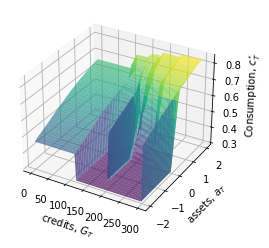

In [16]:
# last period
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

t = par.T-46
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

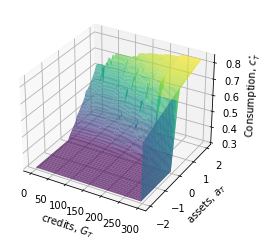

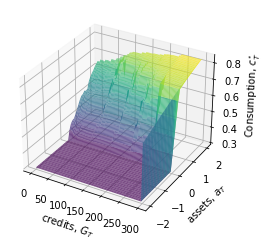

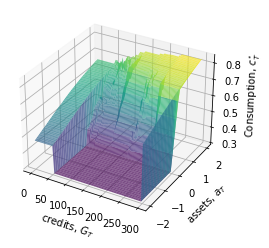

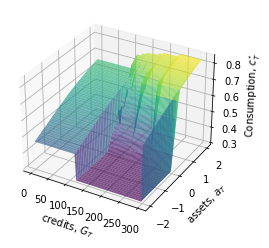

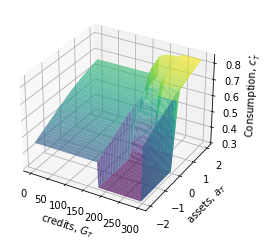

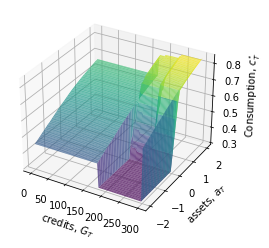

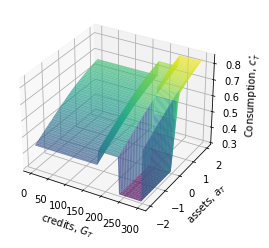

In [17]:
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

for t in range(par.T-49,par.T-42):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(G_mesh, a_mesh, sol.c[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
    ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

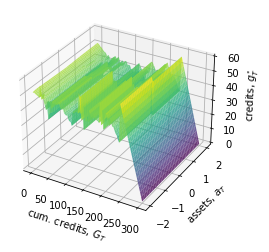

In [18]:
t = par.T-49

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.g[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='cum. credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='credits, $g_{T}^{\star}$');

In [19]:
sol.g[par.T-45,0,par.Na-2,:]

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
       46.198715, 44.999972, 43.777091, 42.869929, 42.000003, 40.451227,
       49.379453, 47.183372, 50.525932, 48.000002, 47.183411, 43.84381 ,
       46.116787, 43.843867, 42.194573, 41.770938, 39.830106, 38.972244,
       36.617659, 34.791774, 33.564977, 57.00001 , 

In [20]:
print(sol.c_s[par.T-5,0,:,29])

[0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001
 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001
 0.000001 0.000001 0.000001 0.000001 0.372635 0.467249 0.567087 0.619476
 0.649905 0.677196 0.714892 0.738419 0.761927 0.782463 0.804546 0.827017
 0.846239 0.866486 0.890263 0.908173 0.930611 0.952877 0.970185 0.995482
 1.011619]


In [21]:
print(sol.g[par.T-49,0,0,:])

[51.240967 51.       50.932159 50.281036 49.897522 49.444061 48.909576
 57.       48.       51.       48.       45.       42.       47.183441
 36.       39.9245   48.715302 43.843872 48.715393 47.183441 47.90451
 48.       47.787689 47.568512 49.351044 48.       45.430756 45.160767
 46.938263 43.554016 42.675659 42.118469 42.788361 39.924408 39.
 38.863495 36.544464 45.866364 45.       45.92038  46.691345 46.729156
 45.953339 59.480164 57.       42.       51.       36.       51.
 42.       45.       42.       49.82309  48.       45.856842 45.
 48.       45.994171 45.31485  45.       44.656769 43.798553 56.83429
 42.744873 52.205109 40.167938 47.183441 51.       50.525665 48.
 43.843781 48.715302 46.11676  43.843781 43.843781 41.7052   39.924316
 38.972168 36.61908  34.791779 60.       57.00001  54.00001  51.00001
 48.00001  45.00001  42.00001  39.00001  36.00001  33.00001  30.00001
 27.00001  24.00001  21.00001  18.00001  15.00001  12.00001   9.00001
  6.00001   3.00001   0.      ]


In [22]:
sol.V_s[par.T-9,0,2,0]
sol.V_w[par.T-9,0,0]

-2000000.0

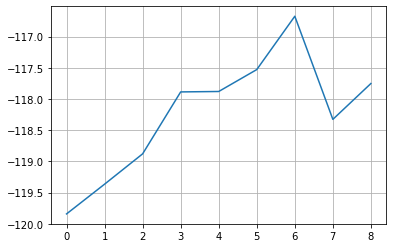

In [23]:
y_ = [model.value_of_choice_s(2.0, 80.0, 0, 1.0, 220, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(y_)

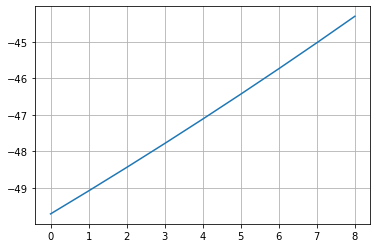

In [24]:
z_ = [model.value_of_choice_w(2.0,0, 2.0, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(z_)

In [25]:
#model.simulate()

In [26]:
# cb_counter = 0

# def callbackF(x, y, z):
#     global cb_counter
#     cb_counter += 1
#     print(cb_counter)
#     print("rho: %a, gamma_max: %a, gamma_min: %a" % (x, y, z))

# def pis(x,y,z):
#     callbackF(x,y,z)
    
#     model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
#     model.solve()
#     model.simulate()


#     helper = np.array([7,6,6,5,5,5,5,5,5,5])
#     ret = np.zeros(10)
#     step = np.zeros(10)
#     for i in range(10):
#         model_a = model.copy()

#         model_a.sim.m_init[:] = i
#         model_a.sim.a_init[:] = 0.0
#         model_a.sim.e_init[:] = 0
#         model_a.simulate()

#         listen = np.mean(model_a.sim.g,axis=0)
#         listen = np.sum(listen>0.001)
#         print("Type %a = %a " % (i, listen), end = "")
#         ret[i] = listen

#         step[i] = (listen - helper[i])**2

#     print("-----------------")
#     return np.sum(step)

In [27]:
# obj = lambda x: pis(x[0],x[1],x[2])

# res = minimize(obj,[7.35,0.0105,0.0162], method='SLSQP', callback=callbackF, options={'disp': True},constraints=({'type': 'ineq', 'fun': lambda x: 1 if x[1] < x[2] else 0}))

# print(res.x[0])

In [28]:
# def pis(x,y,z):

#     model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
#     model.solve()
#     model.simulate()


#     helper = np.array([7,6,6,5,5])
#     ret = np.zeros(5)
#     step = np.zeros(5)
#     for i in range(5):
#         model_a = model.copy()

#         model_a.sim.m_init[:] = i
#         model_a.sim.a_init[:] = 0.0
#         model_a.sim.e_init[:] = 0
#         model_a.simulate()

#         listen = np.mean(model_a.sim.g,axis=0)
#         listen = np.sum(listen>0.001)
#         ret[i] = listen

#         step[i] = (listen - helper[i])**2

#     return ret

# import joblib

# def printer_func(rho, gamma_max, gamma_min):
#     if gamma_max < gamma_min:
#         print("rho: %.5f, gamma_max: %.5f, gamma_min: %.5f - %a" % (rho, gamma_max, gamma_min, pis(rho, gamma_max, gamma_min)))
    
# joblib.Parallel(n_jobs=11)(joblib.delayed(printer_func)(rho, gamma_max, gamma_min) for rho in np.linspace(10, 20, 10) for gamma_max in np.linspace(0.01, 0.015, 5) for gamma_min in np.linspace(0.016, 0.022, 5))

In [29]:
model_a = model.copy()

#model_a.sim.m_init[:] = 0
model_a.sim.a_init[:] = 0.0
model_a.sim.e_init[:] = 0
model_a.simulate()

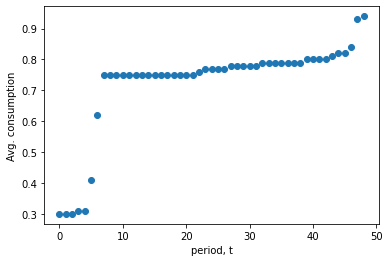

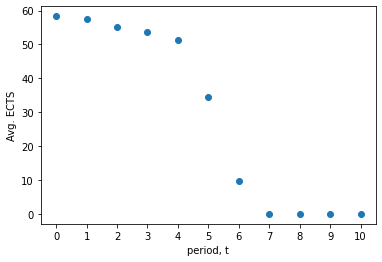

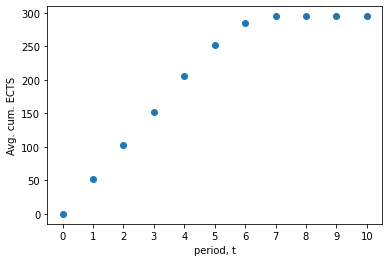

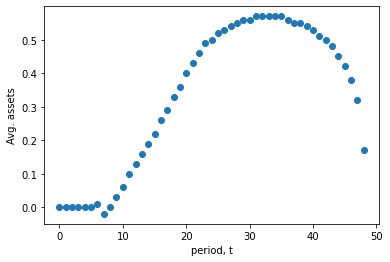

In [32]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption');

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(model_a.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(model_a.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(0,par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets');

In [33]:
print(np.around(np.mean(model_a.sim.a,axis=0),decimals=2))

[ 0.   -0.   -0.   -0.   -0.   -0.    0.01 -0.02  0.    0.03  0.06  0.1
  0.13  0.16  0.19  0.22  0.26  0.29  0.33  0.36  0.4   0.43  0.46  0.49
  0.5   0.52  0.53  0.54  0.55  0.56  0.56  0.57  0.57  0.57  0.57  0.57
  0.56  0.55  0.55  0.54  0.53  0.51  0.5   0.48  0.45  0.42  0.38  0.32
  0.17]


In [ ]:
budget = np.sum(par.tax*np.mean(model_a.sim.income[:,:-1],axis=0)) - np.sum(np.mean(model_a.sim.su[:,:-1],axis=0))
print(budget)
print(np.mean(model_a.sim.income[:,:-1],axis=0))

20.775875017341367
[0.       0.       0.001429 0.019007 0.028031 0.308567 0.926351 1.29076
 1.290491 1.290326 1.291266 1.291474 1.290614 1.291412 1.291089 1.289975
 1.290942 1.291506 1.291562 1.291696 1.291973 1.29156  1.290292 1.291571
 1.291847 1.291049 1.291725 1.291123 1.291926 1.291147 1.292346 1.291021
 1.291451 1.290815 1.291048 1.290693 1.290891 1.291249 1.29252  1.291607
 1.291048 1.291366 1.291151 1.291367 1.291833 1.290743 1.290653 1.290268]


In [ ]:
listen = np.mean(model_a.sim.g,axis=0)
listen = np.sum(listen>0.001)

print(listen)

7


In [ ]:
# def zero_budget(tax):
#     model_a_2 = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'rho':11,'gamma_max':0.008,'gamma_min':0.0178,'tau':5,'su':0.5,'tax':tax})
#     model_a_2.solve()
#     model_a_2.simulate()
#     return (np.sum(tax*np.mean(model_a_2.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(model_a_2.sim.su[:,:-1],axis=0))))

# res = optimize.root_scalar(zero_budget, bracket=[0.0, 0.99], method='brentq')

In [ ]:
#print(res)

In [ ]:
asset_sim = model_a.sim.a
asset_sim[2]

array([ 0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.1632  , -0.312801, -0.171814, -0.121793, -0.12102 ,
       -0.210665, -0.301283, -0.274177, -0.146132, -0.049084, -0.037913,
        0.068317,  0.303341,  0.336712,  0.466276,  0.34487 ,  0.344748,
        0.358256,  0.259313,  0.385004,  0.538271,  0.675105,  0.591897,
        0.590957,  0.643733,  0.618093,  0.602054,  0.564879,  0.495855,
        0.478941,  0.535567,  0.424398,  0.386429,  0.453896,  0.388277,
        0.337705,  0.391085,  0.373367,  0.403754,  0.343034,  0.362301,
        0.320282])

In [ ]:
cons_sim = model_a.sim.c
#cons_sim[6]

np.mean(model_a.sim.g,axis=0)

array([58.328075, 57.646868, 55.223674, 53.742172, 51.296404, 34.398128,
        9.664006,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ])

In [ ]:
cc_sim = model_a.sim.G
cc_sim[2,par.T-1]

for i in range(1000):
    print(cc_sim[i,par.T-1])

300.00001
110.75991825533123
300.00001
300.00001
299.9999999999667
300.00001
300.00001000000003
299.9999999999667
299.9999999999667
299.9999999999667
109.15517607661916
299.9999999999667
300.00001
299.9999999999667
300.00001000000003
299.9999999999667
299.9999999999667
299.9999999999667
300.00001
300.00001
299.9999999999667
299.9999999999667
299.9999999999667
300.00001
299.9999999999667
299.9999999999667
299.9999999999667
299.9999999999667
300.00001
299.9999999999667
300.00001
300.00001
299.9999999999667
299.9999999999667
300.00001
299.9999999999667
300.00001
299.9999999999667
299.9999999999667
299.9999999999667
299.9999999999667
299.9999999999667
299.9999999999667
235.41777067132347
299.9999999999667
299.9999999999667
300.00001
300.00001
300.00001
299.9999999999667
299.9999999999667
299.9999999999667
299.9999999999667
300.00001
300.00001
299.9999999999667
299.9999999999667
299.9999999999667
300.00001
299.9999999999667
300.00000195999047
153.66546527337857
299.9999999999667
299.9999999

In [ ]:
credit_sim = model_a.sim.g
credit_sim[11]

array([68.999984, 69.324267, 68.960369, 57.586358, 53.100377, 46.13688 ,
       -0.00001 ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ])

In [ ]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


[1, 12, 15, 16, 29, 41, 44, 46, 49, 52, 57, 63, 83, 97, 99, 101, 103, 110, 112, 117, 120, 125, 137, 143, 146, 157, 165, 171, 179, 185, 186, 187, 194, 196, 204, 211, 214, 215, 226, 236, 237, 243, 248, 250, 253, 255, 256, 258, 270, 278, 280, 282, 288, 291, 300, 303, 314, 322, 323, 330, 331, 336, 345, 357, 360, 361, 367, 375, 380, 385, 389, 391, 402, 404, 411, 418, 424, 426, 429, 430, 446, 452, 455, 458, 474, 477, 480, 483, 490, 493, 495, 502, 505, 510, 512, 513, 514, 519, 524, 532, 533, 541, 543, 549, 555, 563, 569, 574, 575, 578, 581, 582, 594, 601, 602, 609, 617, 623, 624, 630, 638, 650, 653, 664, 671, 676, 683, 686, 701, 702, 703, 705, 707, 709, 716, 721, 728, 734, 741, 743, 752, 757, 760, 761, 771, 775, 777, 779, 781, 804, 809, 810, 813, 816, 817, 818, 819, 823, 830, 833, 834, 836, 839, 847, 851, 859, 869, 873, 878, 881, 884, 886, 891, 893, 902, 904, 921, 922, 924, 936, 938, 940, 945, 949, 950, 953, 958, 963, 964, 975, 977, 981, 1002, 1007, 1008, 1016, 1025, 1030, 1033, 1036, 1040, 1

In [ ]:
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if model_a.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(model_a.sim.g[i,:]>0.000001)

print(study_0)

np.nanmean(study_0)

[ 7.  7.  7. ...  7. nan  7.]


6.926837342749945

In [ ]:
np.mean(model_a.sim.G[:,par.T-1])

294.72991402531085

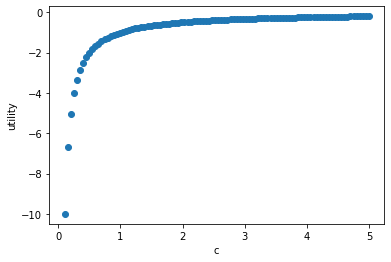

In [ ]:
liste = []
liste_2 = []
g_list = []
c_list = []

for g in np.linspace(0,300,num=300):
    hm = model.util_s(1.0,g,0,29)
    liste.append(hm)
    g_list.append(g)

for c in np.linspace(0.1,5,num=100):
    hm = model.util_s(c, 0, 0, 29)
    liste_2.append(hm)
    c_list.append(c)

fig, ax = plt.subplots()
ax.scatter(c_list,liste_2)
ax.set(xlabel='c',ylabel='utility');

In [ ]:
import math

beta = 0.1*np.sqrt(6)/math.pi

seed=69
rng = np.random.default_rng(seed=seed)


sim.xi = rng.gumbel(loc=0.0, scale=beta, size=10)
sim.xi

array([ 0.011003,  0.022603, -0.05413 , -0.022066,  0.033903, -0.041217,
        0.01871 ,  0.043118,  0.371854, -0.009851])

In [ ]:
# Parameters
h1 = 0.1*np.sqrt(6)/math.pi  # Scale parameter
#mu = 0.0

h2 = -h1 * np.euler_gamma  # Location parameter to center the distribution around zero

# Generate Gumbel-distributed preference shocks centered around zero
preference_shocks = rng.gumbel(h2, h1, size=1000000)

# Calculate the mean (expected value) of the preference shocks
mean_preference_shock = np.mean(preference_shocks)
print("Mean preference shock:", mean_preference_shock)

print(preference_shocks)

Mean preference shock: 8.767314582737433e-05
[-0.078835 -0.06076  -0.137456 ...  0.03517  -0.034345  0.118217]


In [ ]:
loc, scale = 1, 0.1
rv = stats.truncnorm(-1, 0, loc=loc, scale=scale)
r = rv.rvs(size=1000)

In [ ]:
print(r)

[0.980653 0.964188 0.97517  0.964317 0.96389  0.912481 0.905705 0.95319
 0.999628 0.920438 0.98094  0.988823 0.91244  0.938187 0.94859  0.968384
 0.908012 0.987262 0.999242 0.926101 0.945459 0.991298 0.991456 0.912777
 0.988866 0.953131 0.972263 0.993075 0.972321 0.901621 0.954736 0.943962
 0.931437 0.951065 0.904286 0.964541 0.995786 0.987562 0.916471 0.990841
 0.914295 0.990706 0.982716 0.921683 0.992881 0.982778 0.959279 0.967265
 0.93016  0.929232 0.927338 0.987384 0.974004 0.959643 0.927406 0.924353
 0.927837 0.941948 0.981365 0.916177 0.907627 0.921163 0.968505 0.997769
 0.998616 0.971364 0.934187 0.986761 0.94289  0.926186 0.922368 0.968233
 0.974696 0.912999 0.926482 0.913209 0.918674 0.909209 0.916465 0.951715
 0.916758 0.920128 0.992306 0.96054  0.980947 0.979865 0.952295 0.925673
 0.91941  0.975821 0.920799 0.979348 0.953987 0.940505 0.947051 0.966754
 0.938419 0.91298  0.983923 0.915528 0.952649 0.900477 0.905403 0.977161
 0.983779 0.921355 0.989164 0.970208 0.983232 0.9334

In [ ]:
from consav.quadrature import log_normal_gauss_hermite


par.xi_grid,par.xi_weight = log_normal_gauss_hermite(0.1,10,mu=1.0)

In [ ]:

for i in range(10):
    if par.xi_grid[i]>1.0:
        par.xi_grid[i] = 1.0

par.xi_grid

array([0.612047, 0.69546 , 0.776132, 0.859333, 0.947912, 1.      ,
       1.      , 1.      , 1.      , 1.      ])

In [ ]:
par.xi_weight

array([0.000004, 0.000758, 0.019112, 0.135484, 0.344642, 0.344642,
       0.135484, 0.019112, 0.000758, 0.000004])

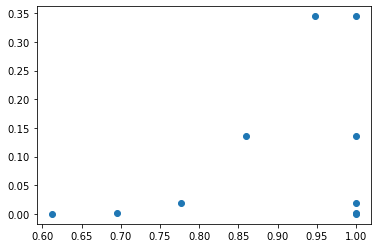

In [ ]:
fig, ax = plt.subplots()
ax.scatter(par.xi_grid,par.xi_weight)
ax.set(xlabel='',ylabel='');

In [ ]:
shape = (par.simN, par.simT)  

sim.xi = np.exp(par.sigma_s*rng.normal(size=shape) - 0.5*par.sigma_s**2)

  

for i in range(par.simN):
    for t in range(par.simT):
        if sim.xi[i,t]>1.0:
            sim.xi[i,t] = 1.0

sim.xi

array([[1.      , 0.888062, 1.      , ..., 0.786895, 0.86089 , 1.      ],
       [0.93708 , 0.988229, 0.935108, ..., 1.      , 1.      , 0.871622],
       [0.839952, 1.      , 0.58225 , ..., 1.      , 0.871998, 0.89781 ],
       ...,
       [0.436317, 0.628769, 1.      , ..., 0.945105, 1.      , 1.      ],
       [1.      , 0.972371, 1.      , ..., 1.      , 0.697422, 0.880896],
       [1.      , 1.      , 0.706072, ..., 0.824352, 0.903245, 0.89584 ]])